In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
             'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
             'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 
             'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 
             'view':int}
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict, parse_dates=['date'])
# add the new features
def add_features(df):
    df['bedrooms_squared'] = df['bedrooms'] * df['bedrooms']
    df['bed_bath_rooms'] = df['bedrooms'] * df['bathrooms']
    df['log_sqft_living'] = df['sqft_living'].map(lambda x: np.log(x))
    df['lat_plus_long'] = df['long'] + df['lat']
    
    return df
    
# sales = add_features(sales)
train_data = pd.read_csv('kc_house_train_data.csv', dtype=dtype_dict, parse_dates=['date'])
# train_data = add_features(train_data)
test_data = pd.read_csv('kc_house_test_data.csv', dtype=dtype_dict, parse_dates=['date'])
# test_data = add_features(test_data)

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [47]:
def get_numpy_data(df, features, output):
    X = np.c_[np.ones(df.shape[0]), df[features].values]
    y = df[output].values
    return X, y

def predict_outcome(feature_matrix, weights):
    predictions = np.matmul(feature_matrix, weights.T)
    return predictions

def feature_derivative(errors, feature):
    derivative = np.matmul(errors.T, feature)
    return derivative

def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        # compute the predictions based on feature_matrix and weights:
        predictions = predict_outcome(feature_matrix, weights)
        # compute the errors as predictions - output:
        errors = output - predictions
        # while not converged, update weights:
        gradient = feature_derivative(errors, feature_matrix)
        weights += 2. * step_size * gradient
            
        gradient_magnitude = np.sqrt(np.dot(gradient, gradient))
        if gradient_magnitude < tolerance:
            converged = True
    return weights


In [48]:
features = ['sqft_living']
output = 'price'
X, y = get_numpy_data(train_data, features, output)
X_test, y_test = get_numpy_data(test_data, features, output)
coef_ = regression_gradient_descent(X, y, [-47000., 1.], step_size=7e-12, tolerance=2.5e7)
print(coef_)

[-46999.88716555    281.91211918]


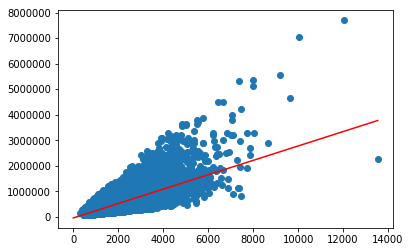

In [49]:
def make_plot(X, y, coef_):
    plt.figure()
    plt.scatter(X[:, 1], y)
    plot_x = np.linspace(0, X[:, 1].max(), 100)
    plt.plot(plot_x, predict_outcome(np.c_[np.ones(len(plot_x)), plot_x], 
                                     np.array(coef_)), 'r-')
    plt.show()
    
make_plot(X, y, coef_)

In [50]:
print('{:6.3e}'.format(np.sum(np.square(y_test - predict_outcome(X_test, coef_)))))

2.754e+14


In [51]:
predict_outcome(X_test[0, :], coef_)

356134.44325500238

In [59]:
features_2 = ['sqft_living', 'sqft_living15']
output = 'price'
X_2, y_2 = get_numpy_data(train_data, features_2, output)
X_2_test, y_2_test = get_numpy_data(test_data, features_2, output)
coef_2 = regression_gradient_descent(X_2, y_2, [-100000., 1., 1.], step_size=4e-12, tolerance=1e8)
print(coef_2)

[ -9.99999691e+04   2.45161562e+02   6.51829285e+01]


In [60]:
coef_2 = np.array([ -9.99999688e+04,   2.45072603e+02,   6.52795277e+01])  # heck answer found online

In [61]:
print('{:6.3e}'.format(np.sum(np.square(y_2_test - predict_outcome(X_2_test, coef_2)))))

2.703e+14


In [62]:
predict_outcome(X_2_test[0, :], coef_2)

366651.41279599996

In [14]:
y_test[0]

310000.0

In [46]:
X_2_test[0]

array([  1.00000000e+00,   1.43000000e+03,   1.78000000e+03])